## Observations and Insights 

In [ ]:
#Observations:
#1. Based on the median values of the final tumor volume, Capomulin and Ramicane appear to be the most effective in reducing the tumor volume in mice.
#2. As the Pearson's correlation coefficient is greater than 0.7 (0.84), this indicates a strong positive correlation between mouse weight and average tumor volume, whereby the average tumor volume increases with greater mouse weight.
#3. An r-squared value of 0.70 indicates that approximately 70% of the observed variation in the dependent variable (average tumor volume) can be explained by the independent variable (mouse weight).  

In [508]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
data = pd.merge(mouse_metadata, study_results, how="outer")

# Display the data table for preview
data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [617]:
# Checking the number of mice.
Number_mice = data["Mouse ID"].count()
Number_mice

Unique_mice = data["Mouse ID"].nunique()
Unique_mice

249

In [606]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint
Duplicate = data.loc[data.duplicated(subset=["Mouse ID", "Timepoint",]),"Mouse ID"]
Duplicate_mice = Duplicate.unique()
Duplicate_miceID = pd.DataFrame(Duplicate_mice)
Duplicate_miceID


,0
0,g989


In [573]:
# Optional: Get all the data for the duplicate mouse ID. 




In [620]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
Clean = data[data["Mouse ID"].isin(Duplicate_mice)==False]
Clean

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [621]:
# Checking the number of mice in the clean DataFrame.
Mice_total = Clean["Mouse ID"].value_counts() 
print(len(Mice_total))


248


## Summary Statistics

In [514]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
Drug_regimen = data.groupby("Drug Regimen")

Tumor_mean = Drug_regimen["Tumor Volume (mm3)"].mean()
Tumor_mean

Tumor_median = Drug_regimen["Tumor Volume (mm3)"].median()
Tumor_median

Tumor_var = Drug_regimen["Tumor Volume (mm3)"].var()
Tumor_var

Tumor_std = Drug_regimen["Tumor Volume (mm3)"].std()
Tumor_std

Tumor_sem = Drug_regimen["Tumor Volume (mm3)"].sem()
Tumor_sem


# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

Tumor_Summary = pd.DataFrame({"Tumor Mean": Tumor_mean,
                            "Tumor Median": Tumor_median,
                            "Tumor Variance": Tumor_var,
                            "Tumor Standard Deviation": Tumor_std,
                            "Tumor SEM": Tumor_sem})
Tumor_Summary

,Tumor Mean,Tumor Median,Tumor Variance,Tumor Standard Deviation,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [515]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0.5, 1.0, 'Total Number of Mice per Drug Regimen')

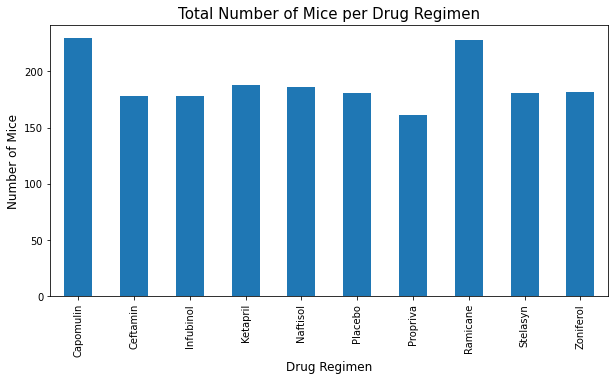

In [516]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
Number_mice_treatment = data.groupby(["Drug Regimen"]).count()["Mouse ID"]
Bar_Pandas = Number_mice_treatment.plot.bar(figsize=(10,5), rot=90)
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Number of Mice", fontsize=12)
plt.title("Total Number of Mice per Drug Regimen", fontsize=15)


Text(0, 0.5, 'Number of Mice')

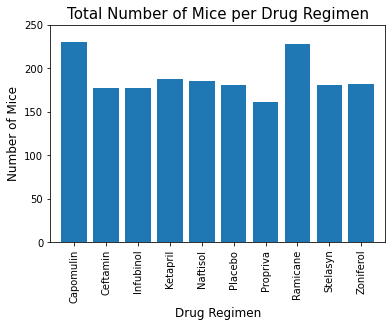

In [517]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
Mice_range = (data.groupby(["Drug Regimen"])["Mouse ID"].count())
Mice_range


Drug_Regimen = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", "Stelasyn", "Zoniferol"]
bars_Drugs_Regimen = [230, 178, 178, 188, 186, 181, 161, 228, 181, 182]

x_axis = np.arange(len(bars_Drugs_Regimen))
plt.bar(x_axis, bars_Drugs_Regimen, align='center')
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, Drug_Regimen, rotation=90)
plt.tick_params(labelsize=10)

plt.xlim(-0.75, len(x_axis)-0.25)
plt.ylim(0, max(bars_Drugs_Regimen)+20)
plt.title("Total Number of Mice per Drug Regimen", fontsize=15)
plt.xlabel("Drug Regimen", fontsize=12)
plt.ylabel("Number of Mice", fontsize=12)




Sex
Female    935
Male      958
Name: Mouse ID, dtype: int64

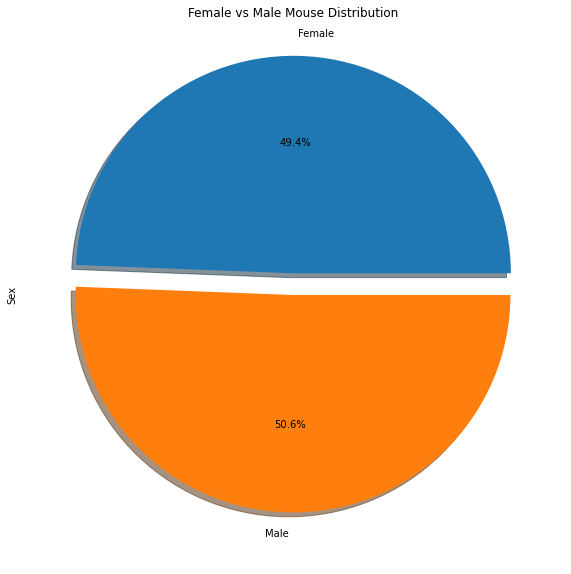

In [518]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
Gender_group = data.groupby(["Sex"])
Gender_distribution = Gender_group["Mouse ID"].count()
Gender_distribution.columns = ["Total Number"]

Gender_distribution.plot(kind="pie", autopct="%1.1f%%", explode=explode, figsize=(15,10), shadow=True)
plt.title("Female vs Male Mouse Distribution")
plt.ylabel("Sex")

explode = (0.1,0)

Gender_distribution

Text(0, 0.5, 'Sex')

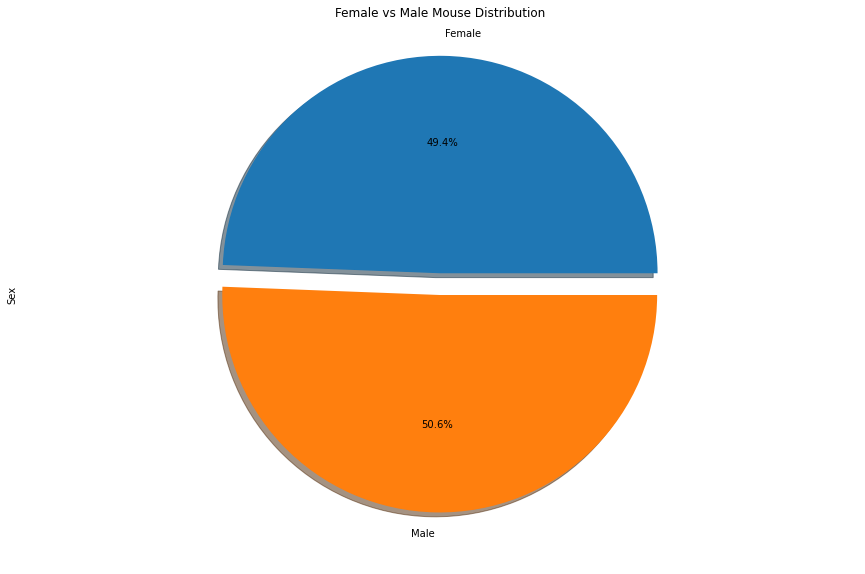

In [519]:
labels = ["Female", "Male"]
sizes = [935, 958]
fig, ax = plt.subplots(figsize=(15,10))
plt.axis("equal")
plt.pie(sizes, labels=labels, autopct="%1.1f%%", explode=explode, shadow=True)
explode = (0.1, 0)
plt.title("Female vs Male Mouse Distribution")
plt.ylabel("Sex")


In [520]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [541]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
Capomulin = data.loc[data["Drug Regimen"] == "Capomulin",:]
Ramicane = data.loc[data["Drug Regimen"] == "Ramicane",:]
Infubinol = data.loc[data["Drug Regimen"] == "Infubinol",:]
Ceftamin = data.loc[data["Drug Regimen"] == "Ceftamin",:]

# Start by getting the last (greatest) timepoint for each mouse
Capomulin_last = Capomulin.groupby("Mouse ID").max()["Timepoint"]
Ramicane_last = Ramicane.groupby("Mouse ID").max()["Timepoint"]
Infubinol_last = Infubinol.groupby("Mouse ID").max()["Timepoint"]
Ceftamin_last = Ceftamin.groupby("Mouse ID").max()["Timepoint"]


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
Capomulin_df = pd.merge(Capomulin_last, data, on=("Mouse ID", "Timepoint"))
Ramicane_df = pd.merge(Ramicane_last, data, on=("Mouse ID", "Timepoint"))
Infubinol_df = pd.merge(Infubinol_last, data, on=("Mouse ID", "Timepoint"))
Ceftamin_df = pd.merge(Ceftamin_last, data, on=("Mouse ID", "Timepoint"))



In [522]:
# Put treatments into a list for for loop (and later for plot labels)
Treatments = ["Capomulin", "Ramincane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
Capomulin_tumor_vol = []
Ramincane_tumor_vol = []
Infubinol_tumor_vol = []
Ceftamin_tumor_vol = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 
Capomulin_tumor = Capomulin_df["Tumor Volume (mm3)"]
Cap_Quartiles = Capomulin_tumor.quantile([0.25,0.5,0.75])
Cap_LQ = Cap_Quartiles[0.25]
Cap_UQ = Cap_Quartiles[0.75]
Cap_IQR = Cap_UQ - Cap_LQ

Cap_LB = Cap_LQ - (1.5*Cap_IQR)
Cap_UB = Cap_UQ + (1.5*Cap_IQR)

print(f"The lower quartile of Capomulin final tumor volume is: {Cap_LQ}")
print(f"The upper quartile of Capomulin final tumor volume is: {Cap_UQ}")
print(f"The interquartile range of Capomulin final tumor volume is: {Cap_IQR}")
print(f"The median value of Capomulin final tumor volume is: {Cap_Quartiles[0.5]}")
print(f"Values below {Cap_LB} may be outliers")
print(f"Values above {Cap_UB} may be outliers")
print("\n")

Ramicane_tumor = Ramicane_df["Tumor Volume (mm3)"]
Ram_Quartiles = Ramicane_tumor.quantile([0.25,0.5,0.75])
Ram_LQ = Ram_Quartiles[0.25]
Ram_UQ = Ram_Quartiles[0.75]
Ram_IQR = Ram_UQ - Ram_LQ

Ram_LB = Ram_LQ - (1.5*Ram_IQR)
Ram_UB = Ram_UQ + (1.5*Ram_IQR)

print(f"The lower quartile of Ramicane final tumor volume is: {Ram_LQ}")
print(f"The upper quartile of Ramicane final tumor volume is: {Ram_UQ}")
print(f"The interquartile range of Ramicane final tumor volume is: {Ram_IQR}")
print(f"The median value of Ramicane final tumor volume is: {Ram_Quartiles[0.5]}")
print(f"Values below {Ram_LB} may be outliers")
print(f"Values above {Ram_UB} may be outliers")
print("\n")

Infubinol_tumor = Infubinol_df["Tumor Volume (mm3)"]
Inf_Quartiles = Infubinol_tumor.quantile([0.25,0.5,0.75])
Inf_LQ = Inf_Quartiles[0.25]
Inf_UQ = Inf_Quartiles[0.75]
Inf_IQR = Inf_UQ - Inf_LQ

Inf_LB = Inf_LQ - (1.5*Inf_IQR)
Inf_UB = Inf_UQ + (1.5*Inf_IQR)

print(f"The lower quartile of Infubinol final tumor volume is: {Inf_LQ}")
print(f"The upper quartile of Infubinol final tumor volume is: {Inf_UQ}")
print(f"The interquartile range of Infubinol final tumor volume is: {Inf_IQR}")
print(f"The median value of Infubinol final tumor volume is: {Inf_Quartiles[0.5]}")
print(f"Values below {Inf_LB} may be outliers")
print(f"Values above {Inf_UB} may be outliers")
print("\n")

Ceftamin_tumor = Ceftamin_df["Tumor Volume (mm3)"]
Cef_Quartiles = Ceftamin_tumor.quantile([0.25,0.5,0.75])
Cef_LQ = Cef_Quartiles[0.25]
Cef_UQ = Cef_Quartiles[0.75]
Cef_IQR = Cef_UQ - Cef_LQ

Cef_LB = Cef_LQ - (1.5*Cef_IQR)
Cef_UB = Cef_UQ + (1.5*Cef_IQR)

print(f"The lower quartile of Ceftamin final tumor volume is: {Cef_LQ}")
print(f"The upper quartile of Ceftamin final tumor volume is: {Cef_UQ}")
print(f"The interquartile range of Ceftamin final tumor volume is: {Cef_IQR}")
print(f"The median value of Ceftamin final tumor volume is: {Cef_Quartiles[0.5]}")
print(f"Values below {Cef_LB} may be outliers")
print(f"Values above {Cef_UB} may be outliers")
print("\n")

The lower quartile of Capomulin final tumor volume is: 32.37735684
The upper quartile of Capomulin final tumor volume is: 40.1592203
The interquartile range of Capomulin final tumor volume is: 7.781863460000004
The median value of Capomulin final tumor volume is: 38.1251644
Values below 20.70456164999999 may be outliers
Values above 51.83201549 may be outliers


The lower quartile of Ramicane final tumor volume is: 31.56046955
The upper quartile of Ramicane final tumor volume is: 40.65900627
The interquartile range of Ramicane final tumor volume is: 9.098536719999998
The median value of Ramicane final tumor volume is: 36.56165229
Values below 17.912664470000003 may be outliers
Values above 54.30681135 may be outliers


The lower quartile of Infubinol final tumor volume is: 54.04860769
The upper quartile of Infubinol final tumor volume is: 65.52574285
The interquartile range of Infubinol final tumor volume is: 11.477135160000003
The median value of Infubinol final tumor volume is: 60.16

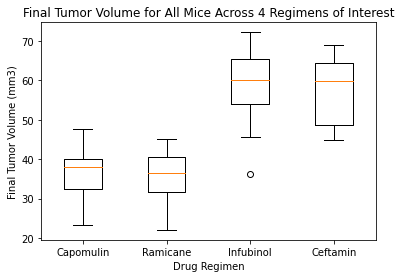

In [523]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
Final = [Capomulin_tumor, Ramicane_tumor, Infubinol_tumor, Ceftamin_tumor]
Drug_Regimen = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volume for All Mice Across 4 Regimens of Interest')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(Final, labels=Drug_Regimen)
plt.show()

## Line and Scatter Plots

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


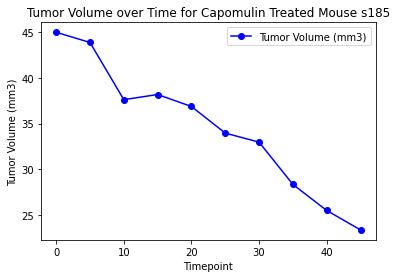

In [628]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
Cap_line = Capomulin.loc[Capomulin["Mouse ID"] == "s185",:]


Cap_line.plot.line(x='Timepoint', y='Tumor Volume (mm3)', marker="o", color="blue")
plt.title('Tumor Volume over Time for Capomulin Treated Mouse s185')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

Cap_line

Text(0.5, 1.0, 'Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')

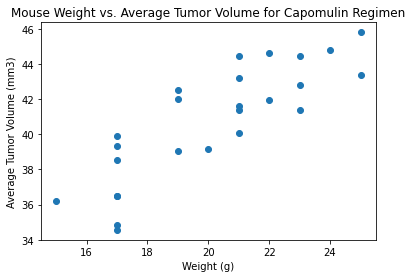

In [530]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
Capomulin_Avg = Capomulin.groupby(['Mouse ID']).mean()
Capomulin_Avg

Weight = Capomulin_Avg['Weight (g)']
Tumor_Vol = Capomulin_Avg['Tumor Volume (mm3)']

plt.scatter(Weight, Tumor_Vol)
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')



## Correlation and Regression

In [631]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(Weight, Tumor_Vol)

print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")
print(f"The r-squared value is: {0.84**2}")

The correlation between mouse weight and average tumor volume is 0.84
The r-squared value is: 0.7055999999999999


y = 0.95x + 21.55


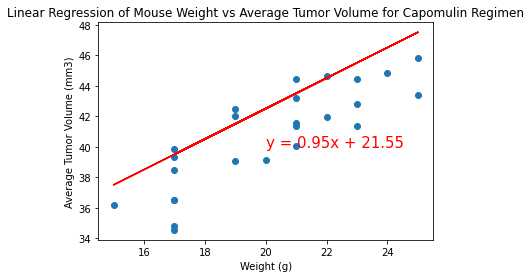

In [540]:
x_values = Weight
y_values = Tumor_Vol
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values + slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

plt.scatter(x_values, y_values)
plt.plot(x_values, regress_values, "r-")
plt.annotate(line_eq, (20,40), fontsize=15, color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Linear Regression of Mouse Weight vs Average Tumor Volume for Capomulin Regimen')
plt.show()


